In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import networkx as nx

In [2]:
#PROYECCION BOGOTÁ
EPSG = 'EPSG:21897'

In [3]:
ZAT_index = pd.read_csv("bogota/zat_index.txt", sep=" ", header=None, names=["ZAT", "index"])
ZAT = gpd.read_file("bogota/ZAT/ZAT.shp")[['ZAT', 'geometry']].to_crs(EPSG)
ZAT = ZAT.merge(ZAT_index, on="ZAT")

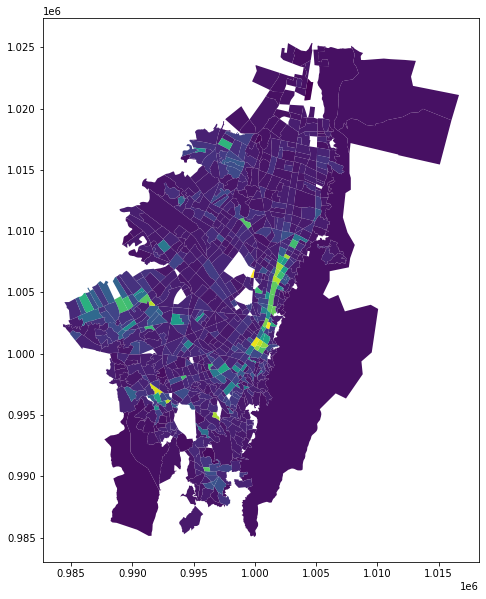

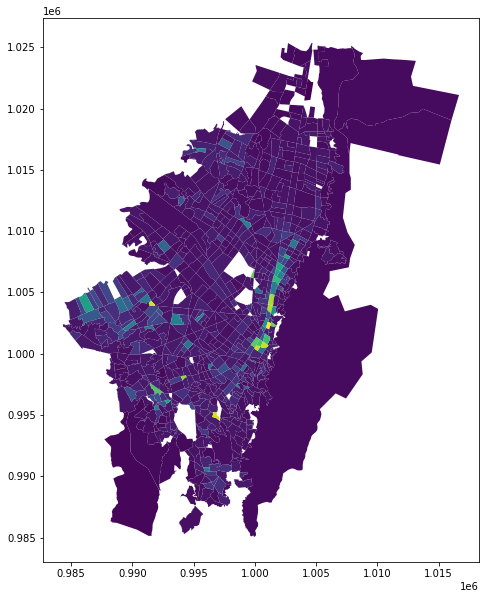

In [4]:
for links in ['15k', '28k']:
    attackRate=pd.read_csv(
        f'../../map_impact_confinement/out/map_impact_confinement/bogota_beta_4,0_200k_links_{links}.txt', sep='\t')
    attackRate = pd.merge(ZAT, attackRate, left_on='index', right_on='index')

    fig, ax = plt.subplots(figsize=(10,10))
    attackRate.plot('destination_mean', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), norm=Normalize())

    plt.savefig(f'links_destination_bogota_{links}.png', dpi=300, bbox_inches='tight')



# GEO cities3

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [6]:
zcta = gpd.read_file('geo/zcta510/tl_2020_us_zcta510.shp')
zcta = zcta.astype({'ZCTA5CE10': 'int64'})

In [7]:
statename = 'ma'
city = 'ma'

states_fips = pd.read_csv('geo/states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']


zcta_index = pd.read_csv('cities3/'+city+'/zcta_index.csv', sep=' ')#.reset_index()
zcta_index = zcta.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
zcta_index = zcta_index.sort_values('zcta_index')[['zcta', 'zcta_index', 'geometry']].rename(columns={'zcta_index':'index'})

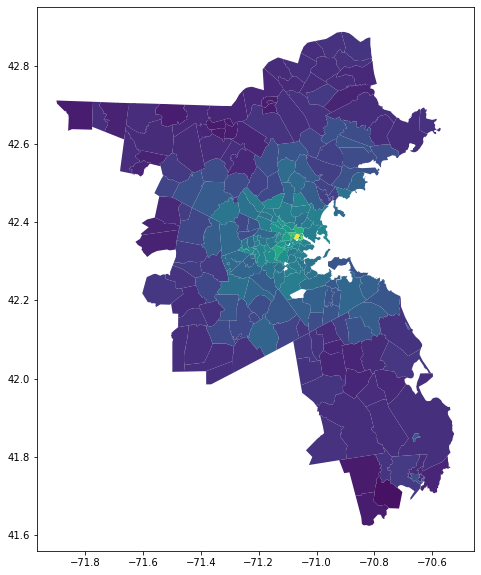

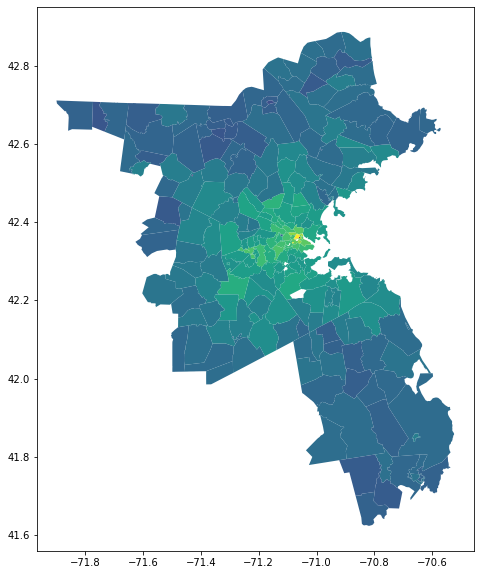

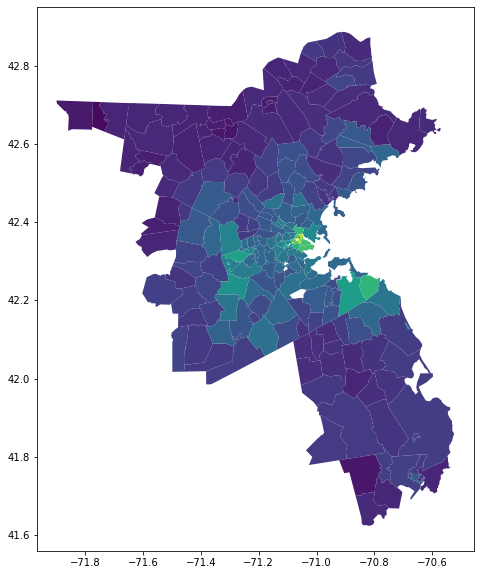

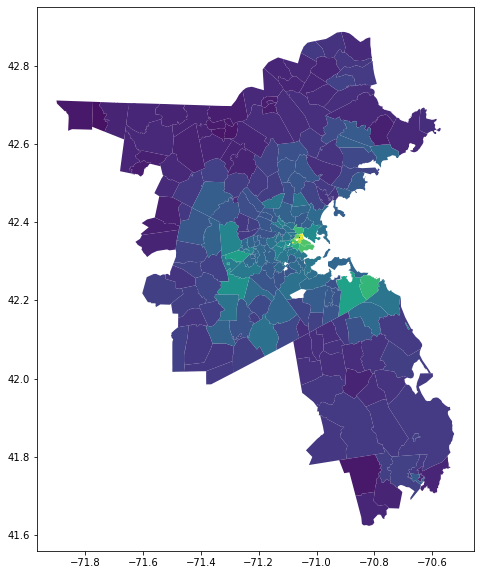

In [78]:
for links in ['2k', '4k', '6k', '8k']:
    attackRate=pd.read_csv(
        f'../../map_impact_confinement/out/map_impact_confinement/{city}_beta_4,0_200k_links_{links}.txt', sep='\t')
    attackRate = pd.merge(zcta_index, attackRate, left_on='index', right_on='index')

    fig, ax = plt.subplots(figsize=(10,10))
    attackRate.plot('origin_mean', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize())#, norm=Normalize(vmin=0, vmax=1))

    plt.savefig(f'links_origin_{city}_{links}.png', dpi=300, bbox_inches='tight')